In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Данные

In [2]:
df = pd.read_csv('gazprom_data.csv', header=0, index_col=0)
df

,Revenue(mln rub),Natural Gas (usd/m3),usd/rub,eur/rub
1999,4.623440e+05,2.329,27,NaN
2000,5.848990e+05,9.775,28,NaN
2001,6.663913e+05,2.570,30,NaN
2002,7.258023e+05,4.789,32,NaN
2003,8.137387e+05,6.189,29,NaN
2004,1.060025e+06,6.149,28,NaN
2005,1.504144e+06,11.225,29,34.0
2006,1.986300e+06,5.740,26,35.0
2007,2.620281e+06,7.483,25,36.0
2008,2.899911e+06,5.622,29,41.0


# Построим простую модель выручки

In [3]:
df['Diff Revenue(mln rub)'] = df['Revenue(mln rub)'].diff()
data = df.loc[2005:]
train_test_split_index = 2014
data_train = data.loc[:train_test_split_index]
data_test = data.loc[train_test_split_index:].iloc[1:]

Text(0.5,1,'Diff Revenue(mln rub) predict')

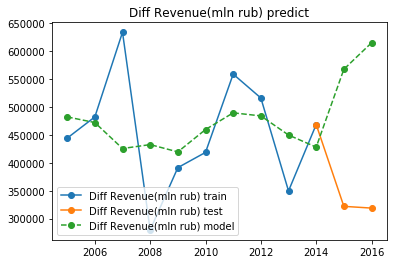

In [4]:
X_columns = ['Natural Gas (usd/m3)', 'usd/rub', 'eur/rub']
y_column = 'Diff Revenue(mln rub)'
model = LinearRegression()
model.fit(X=data_train[X_columns], y=data_train[y_column])
model_forecast = model.predict(X=data[X_columns])
model_forecast = pd.Series(index=data.index, name='{} model'.format(y_column), data=model_forecast)

# PLOT PREDICTIONS
fig, ax = plt.subplots()
data_train[y_column].plot(ax=ax, style='o-', label='{} train'.format(y_column))
data.loc[train_test_split_index:][y_column].plot(ax=ax, style='o-', label='{} test'.format(y_column))
model_forecast.plot(ax=ax, style='o--', label=model_forecast.name)
ax.legend()
ax.set_title('{} predict'.format(y_column))

(<matplotlib.legend.Legend at 0x27512f83cf8>,
 Text(0.5,1,'Revenue(mln rub) forecast'))

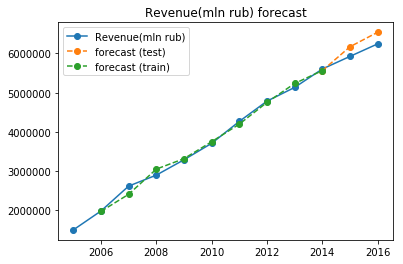

In [5]:
revenue_forecast = model_forecast.to_frame()
revenue_forecast['Revenue forecast'] = None
for i in revenue_forecast.index[1:]:
    revenue_forecast.at[i, 'Revenue forecast'] = data.loc[i-1]['Revenue(mln rub)'] + revenue_forecast.loc[i]['Diff Revenue(mln rub) model']
    
fig, ax = plt.subplots()
data['Revenue(mln rub)'].plot(ax=ax, style='o-')
revenue_forecast['Revenue forecast'].loc[train_test_split_index:].plot(ax=ax, style='o--', label='forecast (test)')
revenue_forecast['Revenue forecast'].loc[:train_test_split_index].plot(ax=ax, style='o--', label='forecast (train)')
ax.legend(), ax.set_title('Revenue(mln rub) forecast')

# Задание
1. Что не так с моделью выше? (опишите в двух-трех предложениях)
2. На имеющихся данных постройте модель выручки, устойчивую с точки зрения сценарного моделирования